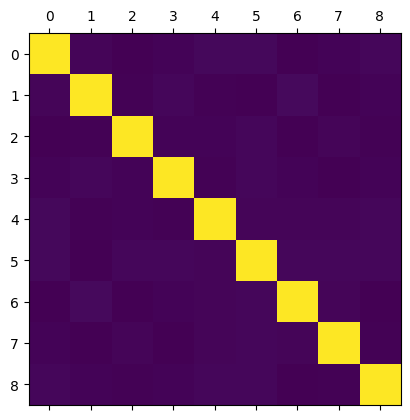

In [115]:
import pandas as pd
import matplotlib.pyplot as plt


n = 9

X = np.load('Datasets/kryptonite-%s-X.npy'%(n))

corr = pd.DataFrame(X).corr()
plt.matshow(corr)

plt.show()

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

possible_n_vals = [9, 12, 15]
possible_e_vals = [1, 3, 5, 7, 15]


def run_model(n, e):

    X = np.load('Datasets/kryptonite-%s-X.npy'%(n))
    y = np.load('Datasets/kryptonite-%s-y.npy'%(n))

    # Shuffle and split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)  # 60% training
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    x_test_scaled = scaler.transform(X_test)

    # print(np.mean(X_train_scaled, axis=0))
    # print(np.std(X_train_scaled, axis=0))

    feature_creator = PCA(n_components=min(e, X_train.shape[1]))
    X_train_features = feature_creator.fit_transform(X_train_scaled)
    X_val_features = feature_creator.transform(X_val_scaled)
    X_test_features = feature_creator.transform(x_test_scaled)
    print(X_train_features.shape)
    
    # print("Created features")

    features = X_train_features.shape[-1]

    print(f'n:[{n}], e:[{e}]')

    # Initialize and fit logistic regression
    classifier = KNeighborsClassifier(weights='distance', n_neighbors=20, n_jobs=-1)
    classifier.fit(X_train_features, y_train)
    print("Fit Model")

    # Evaluate on the validation set
    y_val_pred = classifier.predict(X_val_features)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Evaluate on the test set
    y_test_pred = classifier.predict(X_test_features)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy, features
        


from tqdm import tqdm

acc_by_n = []
feat_by_n = []
for n in tqdm(possible_n_vals):
    single_n = []
    single_feat = []
    for e in tqdm(possible_e_vals):
        acc, feat = run_model(n, e)
        single_n.append(acc)
        single_feat.append(feat)
    acc_by_n.append(single_n)
    feat_by_n.append(single_feat)

print(acc_by_n)

  0%|          | 0/3 [00:00<?, ?it/s]

(7200, 1)
n:[9], e:[1]
Fit Model
Validation Accuracy: 0.5030
Test Accuracy: 0.4981
(7200, 3)
n:[9], e:[3]
Fit Model
Validation Accuracy: 0.7681
Test Accuracy: 0.7681
(7200, 5)
n:[9], e:[5]
Fit Model
Validation Accuracy: 0.9454


Test Accuracy: 0.9463
(7200, 7)
n:[9], e:[7]
Fit Model
Validation Accuracy: 0.9533
Test Accuracy: 0.9591
(7200, 9)
n:[9], e:[15]
Fit Model


 33%|███▎      | 1/3 [00:00<00:01,  1.51it/s]

Validation Accuracy: 0.9528
Test Accuracy: 0.9596


(9600, 1)
n:[12], e:[1]
Fit Model
Validation Accuracy: 0.5315
Test Accuracy: 0.5289


(9600, 3)
n:[12], e:[3]
Fit Model
Validation Accuracy: 0.6065
Test Accuracy: 0.6035
(9600, 5)
n:[12], e:[5]
Fit Model
Validation Accuracy: 0.8260


Test Accuracy: 0.8293
(9600, 7)
n:[12], e:[7]
Fit Model
Validation Accuracy: 0.7504


Test Accuracy: 0.7569
(9600, 12)
n:[12], e:[15]
Fit Model
Validation Accuracy: 0.5553


 67%|██████▋   | 2/3 [00:03<00:01,  1.65s/it]

Test Accuracy: 0.5558


(12000, 1)
n:[15], e:[1]
Fit Model
Validation Accuracy: 0.5067
Test Accuracy: 0.5083
(12000, 3)
n:[15], e:[3]
Fit Model


Validation Accuracy: 0.5197
Test Accuracy: 0.5178
(12000, 5)
n:[15], e:[5]
Fit Model


Validation Accuracy: 0.5203
Test Accuracy: 0.5290
(12000, 7)
n:[15], e:[7]
Fit Model
Validation Accuracy: 0.5093


Test Accuracy: 0.5222
(12000, 15)
n:[15], e:[15]
Fit Model
Validation Accuracy: 0.4962


100%|██████████| 3/3 [00:08<00:00,  2.83s/it]

Test Accuracy: 0.5016
[[0.4981481481481482, 0.7681481481481481, 0.9462962962962963, 0.9590740740740741, 0.9596296296296296], [0.5288888888888889, 0.6034722222222222, 0.8293055555555555, 0.7569444444444444, 0.5558333333333333], [0.5083333333333333, 0.5177777777777778, 0.529, 0.5222222222222223, 0.5015555555555555]]


  0%|          | 0/1 [00:00<?, ?it/s]

(36000, 2)
n:[45], e:[2]
Fit Model
Validation Accuracy: 0.5004
Test Accuracy: 0.5052
(18070, 2) (17930, 2)


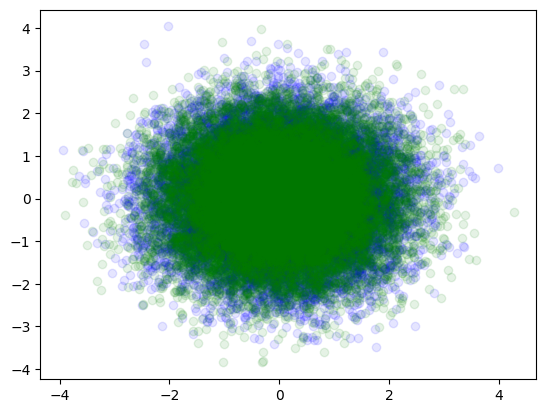

100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

[[0.5051851851851852]]


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

possible_n_vals = [45]
possible_e_vals = [2]


def run_model(n, e):

    X = np.load('Datasets/kryptonite-%s-X.npy'%(n))
    y = np.load('Datasets/kryptonite-%s-y.npy'%(n))

    # Shuffle and split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)  # 60% training
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    x_test_scaled = scaler.transform(X_test)

    # print(np.mean(X_train_scaled, axis=0))
    # print(np.std(X_train_scaled, axis=0))

    feature_creator = PCA(n_components=min(e, X_train.shape[1]))
    X_train_features = feature_creator.fit_transform(X_train_scaled)
    X_val_features = feature_creator.transform(X_val_scaled)
    X_test_features = feature_creator.transform(x_test_scaled)
    print(X_train_features.shape)
    
    # print("Created features")

    features = X_train_features.shape[-1]

    print(f'n:[{n}], e:[{e}]')

    # Initialize and fit logistic regression
    classifier = KNeighborsClassifier(weights='distance', n_neighbors=20, n_jobs=-1)
    classifier.fit(X_train_features, y_train)
    print("Fit Model")

    # Evaluate on the validation set
    y_val_pred = classifier.predict(X_val_features)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Evaluate on the test set
    y_test_pred = classifier.predict(X_test_features)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    ################# plotting ######################

    x_c1 = X_train_features[y_train == 1, :]
    x_c2 = X_train_features[y_train == 0, :]

    print(x_c1.shape, x_c2.shape)

    fig, ax = plt.subplots()
    ax.plot(x_c1[:,0], x_c1[:,1], 'bo', alpha=0.1)
    ax.plot(x_c2[:,0], x_c2[:,1], 'go', alpha=0.1)

    fig.savefig("test.png")
    plt.show()




    return test_accuracy, features
        


from tqdm import tqdm

acc_by_n = []
feat_by_n = []
for n in tqdm(possible_n_vals):
    single_n = []
    single_feat = []
    for e in tqdm(possible_e_vals):
        acc, feat = run_model(n, e)
        single_n.append(acc)
        single_feat.append(feat)
    acc_by_n.append(single_n)
    feat_by_n.append(single_feat)

print(acc_by_n)